# Creating Python Scripts for Raster Analysis
>GEOG 650 GIS Programming and Automation, Liberty University <Br>Jeremiah Jon Shaw <Br>19 November 2024  

>   Our problem statement is as follows: "Imagine that you are a park ranger who has been tasked with determining new potential habitats for the peregrine falcon." For this assignment we will use raster data sets to build a script to locate new habitats for the peregrine falcon in the Snake River Range, Wyoming.


## Discussion on Raster Objects
>This week’s discussion begins with a discussion on creating a raster object. The first method is to use ArcGIS and import the data onto our map, this is the method I have been using for the entire time I have been at school.  The author cautions us, the students, that if we are going to work our script outside of the ArcGIS program this is not the advisable way of creating a raster object. <br> They suggest that we use the file path approach which looks like the example below.

>"raster object name" = arcpy.sa."Class"('filepath')


## Using Raster Object Properties in Tools

>As we are now working with raster data, we are also working with these raster data properties that come along with that data. Because of this, we can use that property data to build tool processes that utilize that information to help us access the data we need in a more exacting way. 
>Take, for instance, a process to only use a raster with four (4) band layers. We can build a tool that only returns rasters with 4 band layers.


<Code> if "Raster Object" <br>"Property" == 4:     
     classRaster = "geoprocessing tool"("raster Object", "file") <br>
else: <Br>
 print(str("Raster".name) + 'does not have four bands.') <code>
 

## Sharing your Python Script
>In this final portion of your discussion before our exercise the authors talk about sharing our script and how we can easily set it up to be shared either from ArcGIS Pro as a Python file or a notebook file. Python files can be used in Integrated development environments (IDEs) of our choosing. Whereas a notebook can be used for ArcGIS products as well as a Jupyter IDE, we can also package a notebook giving others access to all the data, maps, tools, settings, and scripts that are associated with an analysis.

## Script Created to Determine the Answer to Our Question, "Create a Script to Model a Peregrine Falcon Habitat Within a Park to Find Areas That Can be Preserved."
> The code below will be used to create a raster.tif that will show loactions of potential falcon habitats.

In [1]:
# Raster Analysis -- This script is used to model a peregrine falcon habitat within a park to find areas that can be preserved.

import arcpy

# Setting the workspce and creating a raster object "base_raster" from raster class and file path.

arcpy.env.workspace = r"C:\Users\Jon\ArcGIS Data\GEOG 650\Week 5\PythonScriptsRaster\Data" # different data location than tutorial
base_raster = arcpy.sa.Raster('DEM_elkhorn.tif')  # creating a raster object "base_raster" from raster class and file path.

# accessing raster data properties  -- when completed in ArcGIS Pro each returned a value. as this is elevation it returns in "meters"

base_raster.maximum  # 2856.9016113281 meters
base_raster.minimum  # 2174.0673828125 meters
base_raster.noDataValue  # -3.4028230607370965e+38 
base_raster.uncompressedSize  # 62886120

# Create a raster object that represents slope

slope_raster = arcpy.sa.Slope(base_raster, 'DEGREE')

# Identify slopes that are greater than 40 degrees 

gThan40 = slope_raster > 40

# Identify areas that are 160 feet above the mean elevation as a cliff

cliff = base_raster - base_raster.mean
cliff_present = arcpy.sa.GreaterThan(cliff, 160)

# Find habitat areas for peregrine falcons

falcon_habitat = gThan40 & cliff_present

# Saving the analysis

arcpy.env.overwriteOutput=True
falcon_habitat.save(r'C:\Users\Jon\ArcGIS Data\GEOG 650\Week 5\PythonScriptsRaster\Data\HabitatOutput.tif') # adjusted to save in my file.

## resulting output of the analysis.

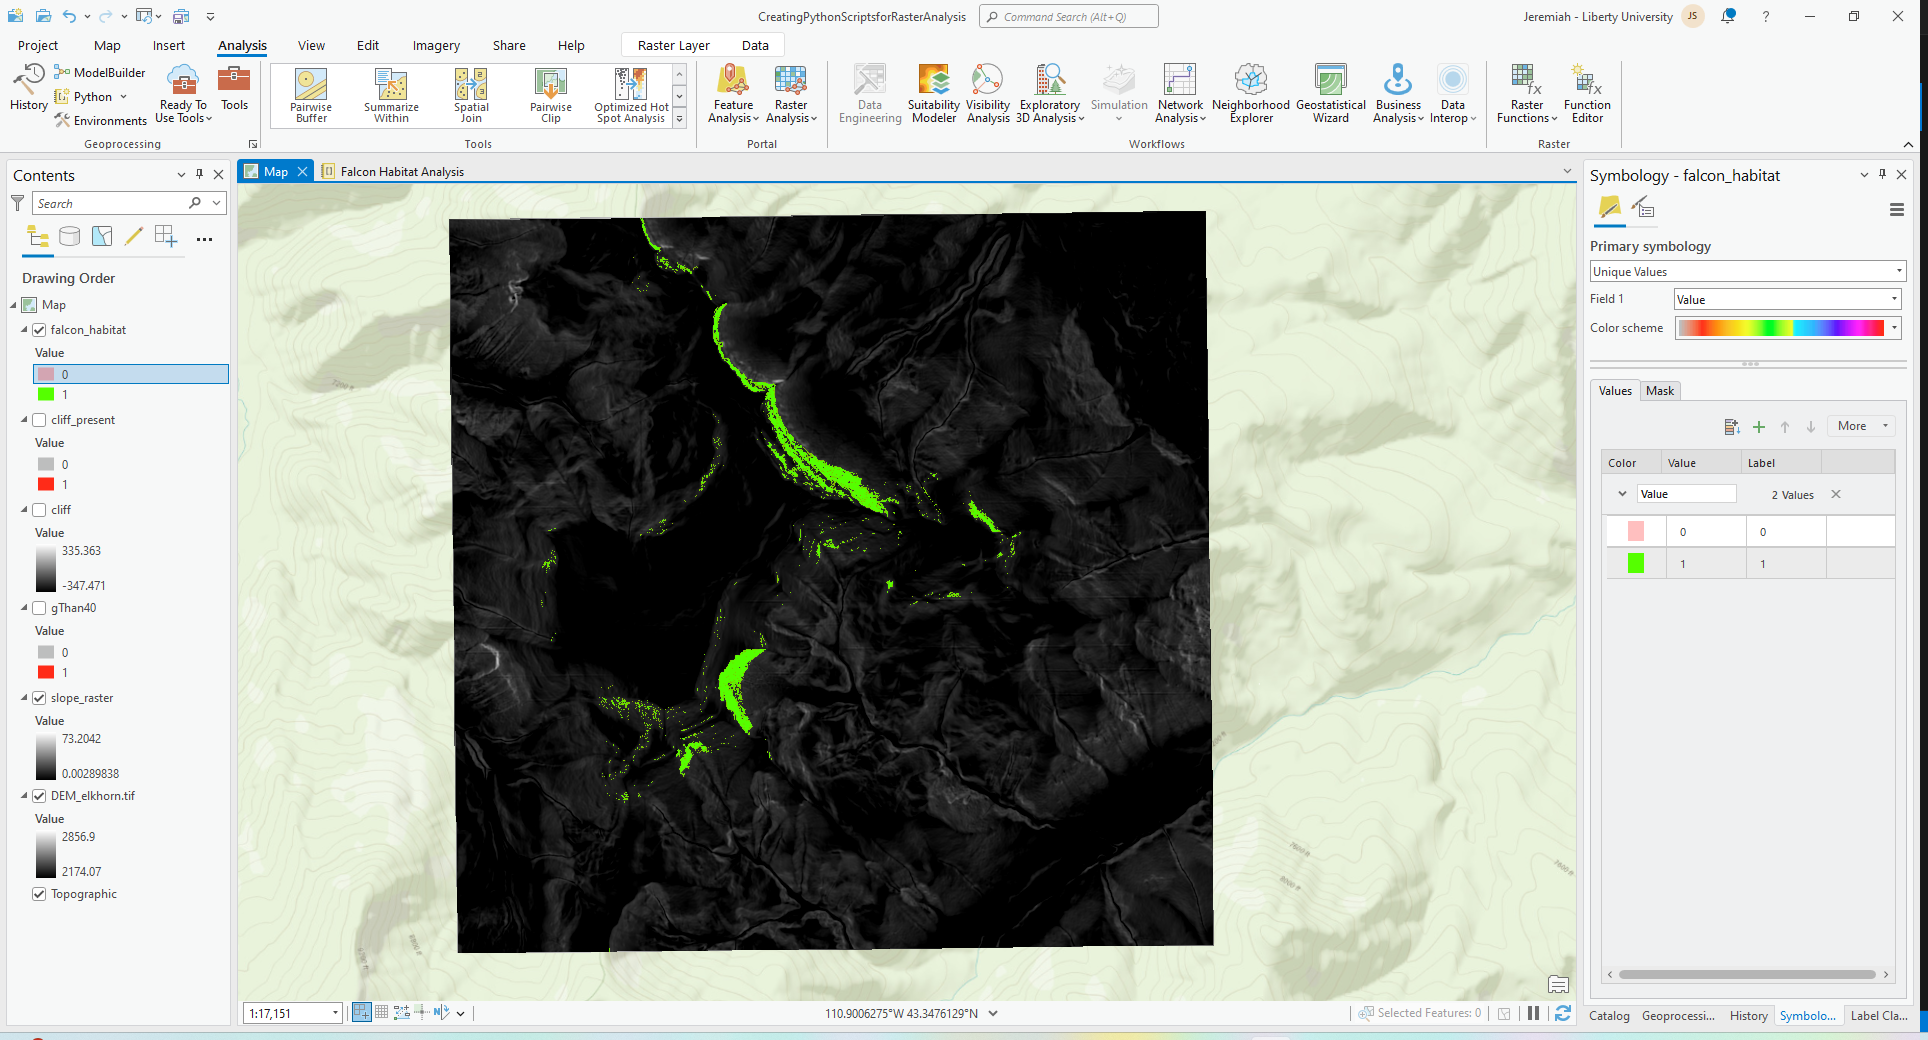

## Conclusion 
>This Assignment again is building my confidence that I can build scripts inside and outside of the ArcGIS Pro program that will automate my processes and quickly and easily return the information I need to complete my assigned tasks. I know that had I decided to take this course sooner in my educational path it would have saved me time effort and multiple headaches that I experienced. Below you will find my examination and my certificate for this Esri Academy course


## Exam
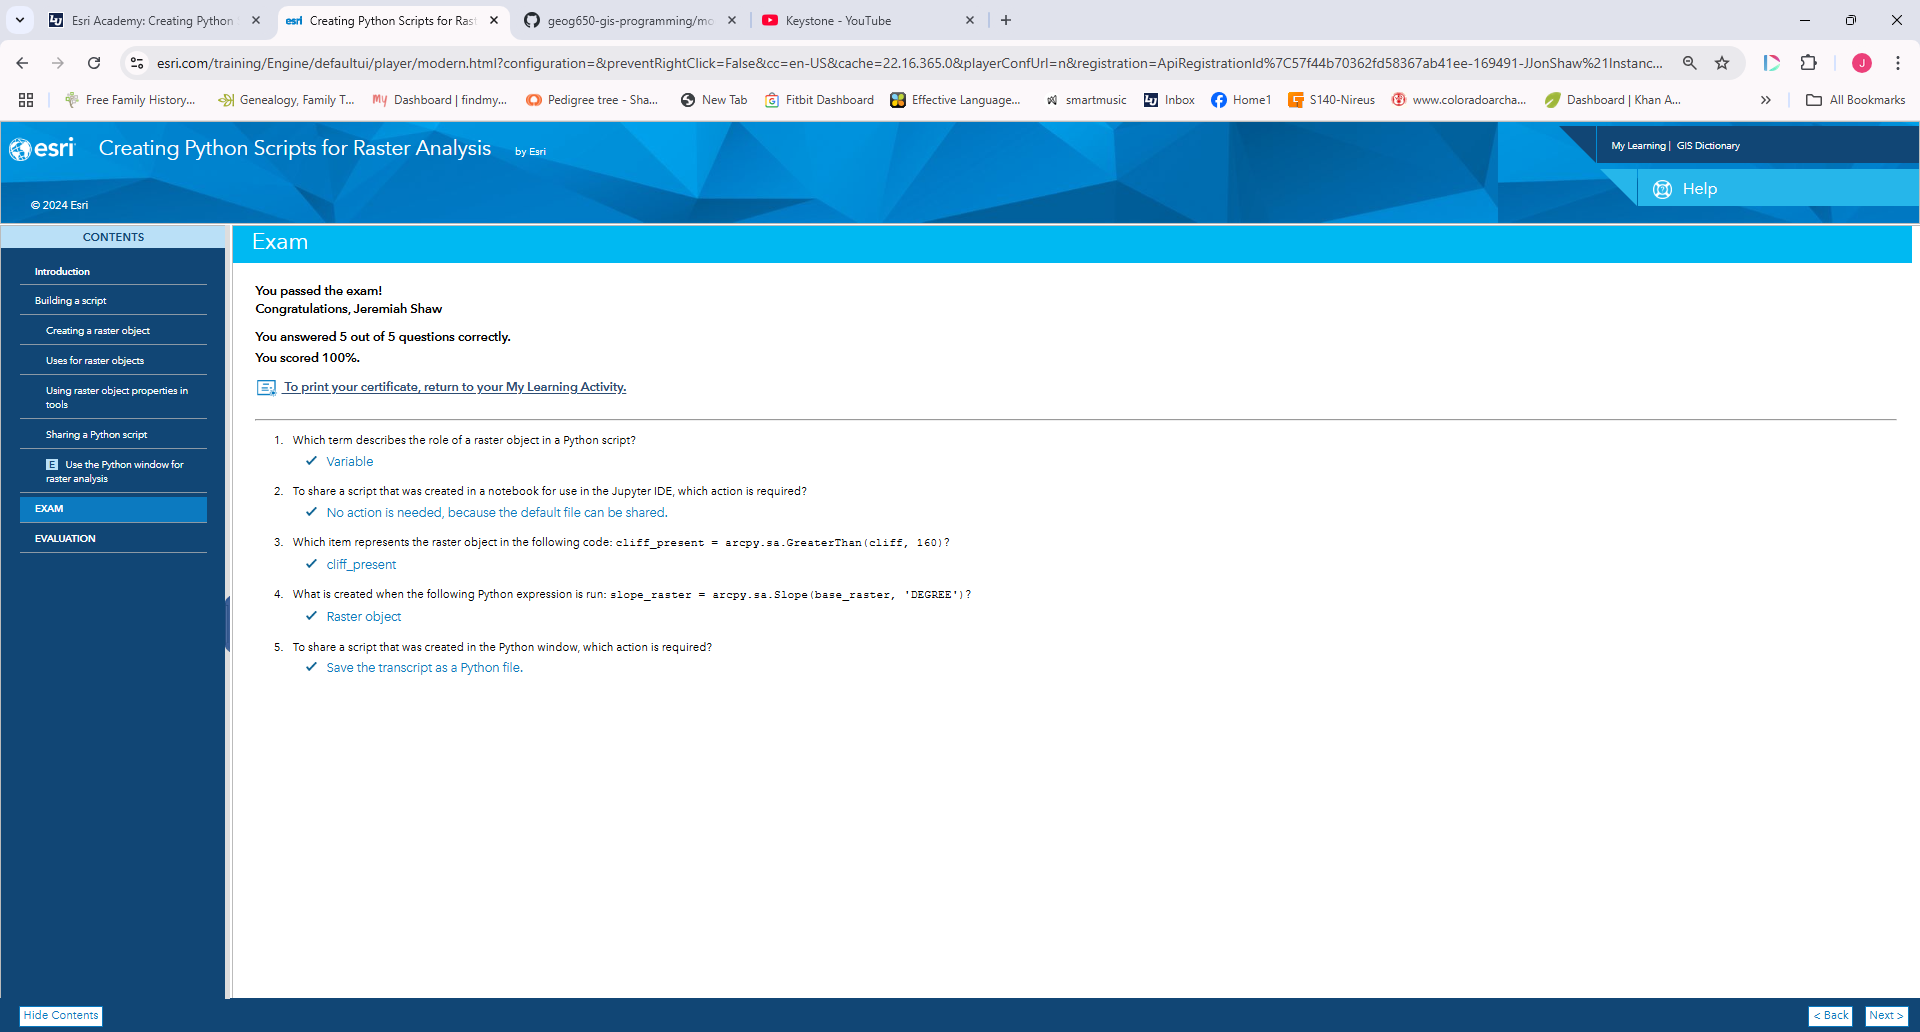

## Certificate of completion
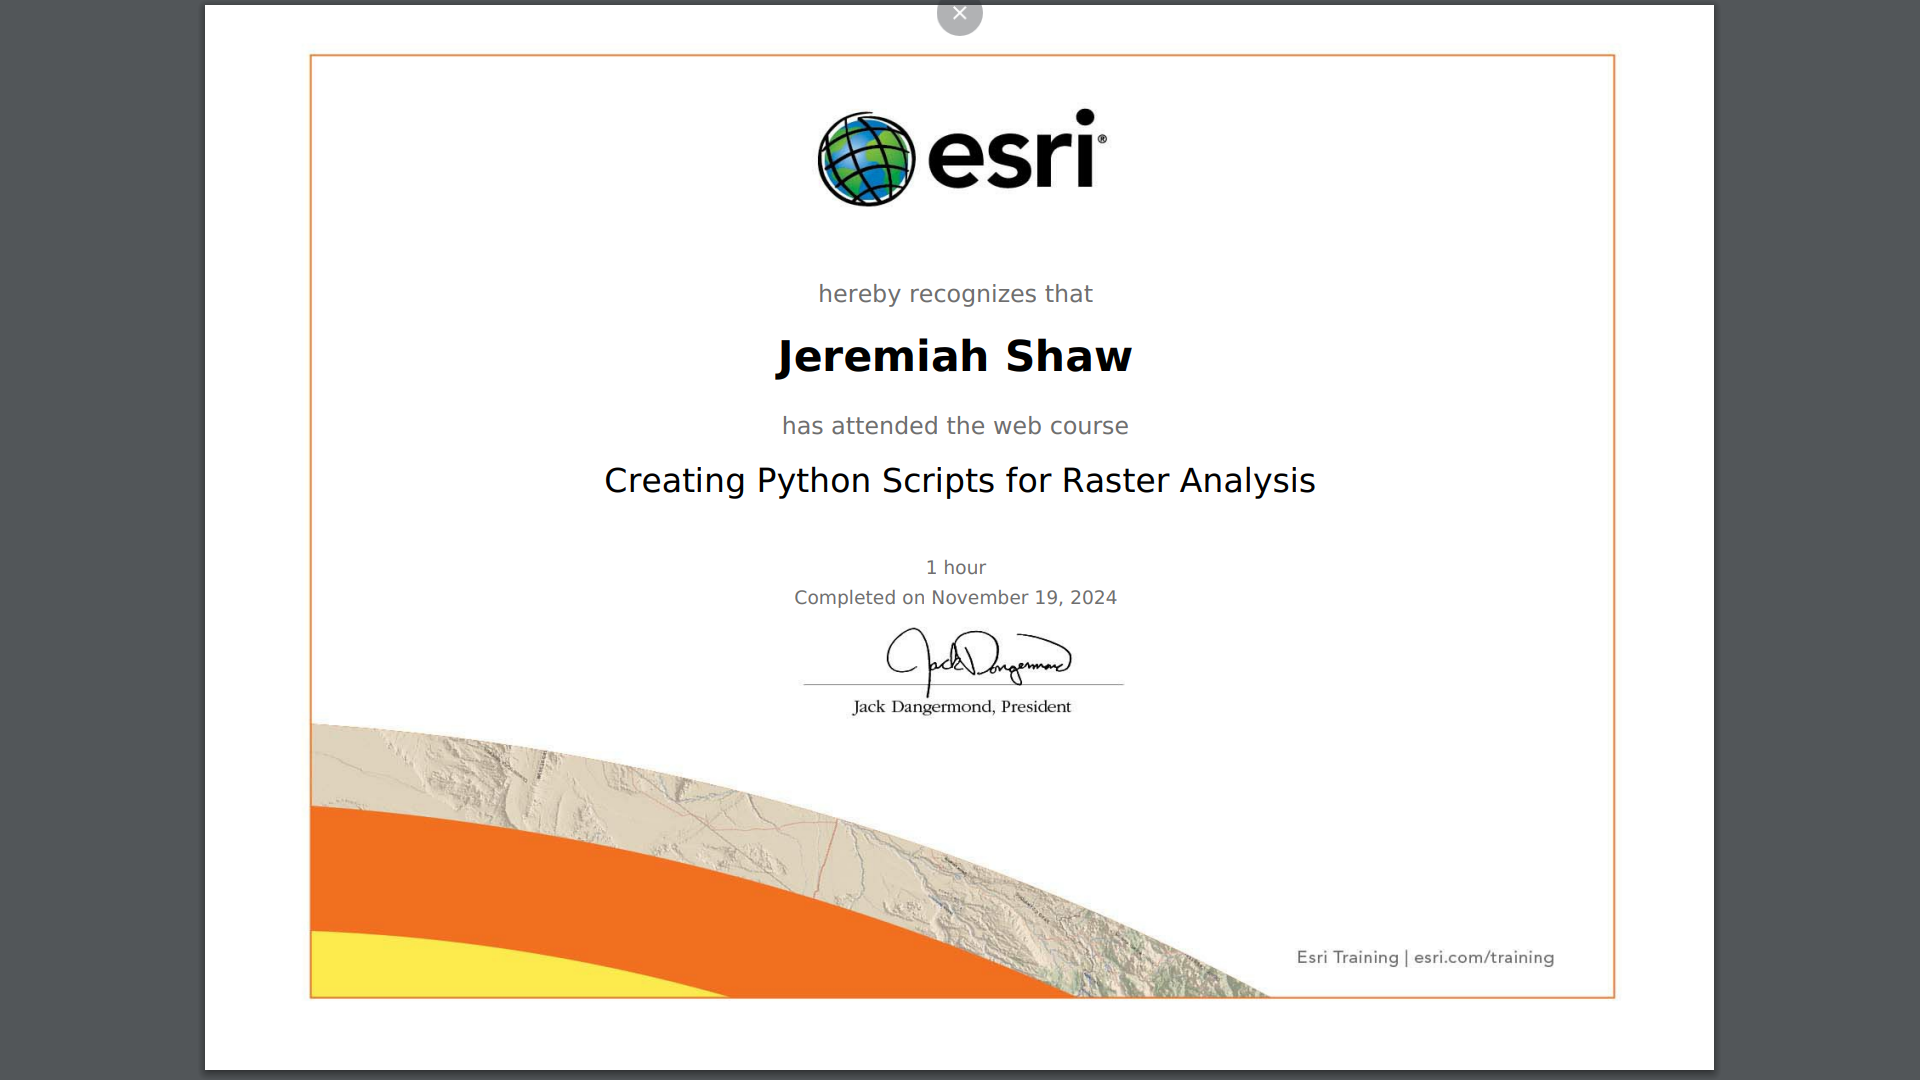